Cohort Analysis - Customer Segmentation

Thank you for Kaggle for the dataset:  https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import date
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
online = pd.read_csv('Documents/cohort_analysis.csv')
online.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [4]:
online['Date'] = pd.to_datetime(online['Date'])
online.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [5]:
# cohort month is when they opened an account
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)
online['InvoiceMonth'] = online['Date'].apply(get_month)
grouping = online.groupby('CustomerNo')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')
online.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,InvoiceMonth,CohortMonth
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019-12-01,2019-06-01
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019-12-01,2018-12-01
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019-12-01,2018-12-01
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,2019-12-01,2018-12-01
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,2019-12-01,2018-12-01


In [6]:
def get_date_int(online, column): 
    year = online[column].dt.year
    month = online[column].dt.month
    day = online[column].dt.day
    return year, month, day

In [7]:
# calculate time difference between any transaction and the first transaction for the customer
# because used a 1 for the day, then use a _
# if used the day in the column, instead of _ would use invoice_day
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,InvoiceMonth,CohortMonth,CohortIndex
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019-12-01,2019-06-01,7.0
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0


In [8]:
# calculate the number of monthly active customers in each cohort 
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerNo'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerNo')
print(cohort_counts)

CohortIndex    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   \
CohortMonth                                                                   
2018-12-01   1086.0  380.0  341.0  396.0  375.0  407.0  397.0  373.0  355.0   
2019-01-01    487.0  107.0  134.0  120.0  151.0  143.0  119.0  120.0  143.0   
2019-02-01    432.0  103.0   80.0  112.0  114.0   99.0  106.0  117.0  106.0   
2019-03-01    492.0   87.0  111.0   98.0  115.0   85.0  125.0  116.0  144.0   
2019-04-01    319.0   69.0   64.0   62.0   64.0   76.0   71.0   83.0   29.0   
2019-05-01    328.0   73.0   61.0   54.0   71.0   76.0   83.0   30.0    NaN   
2019-06-01    267.0   55.0   47.0   60.0   64.0   76.0   30.0    NaN    NaN   
2019-07-01    209.0   36.0   37.0   45.0   64.0   22.0    NaN    NaN    NaN   
2019-08-01    172.0   39.0   41.0   41.0   22.0    NaN    NaN    NaN    NaN   
2019-09-01    283.0   89.0  100.0   36.0    NaN    NaN    NaN    NaN    NaN   
2019-10-01    329.0   85.0   37.0    NaN    NaN    N

In [9]:
# calculate daily cohort index
# by assigning the daily time offset to each transaction and use it for running daily cohort analysis
# is another way to calculate Cohort Index
# Calculate the number of days for the CohortIndex (assume 365 days in a year, and 30 days in a month).
# Extract the difference in days from all previous values
#online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1

In [10]:
# customer retention
#The retention measures how many customers from each of the cohort have returned in the subsequent months.
# retention rate metric calculation
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2018-12-01,100.0,35.0,31.4,36.5,34.5,37.5,36.6,34.3,32.7,37.9,36.5,48.0,25.3
2019-01-01,100.0,22.0,27.5,24.6,31.0,29.4,24.4,24.6,29.4,33.1,34.7,15.0,NaN
2019-02-01,100.0,23.8,18.5,25.9,26.4,22.9,24.5,27.1,24.5,31.0,8.8,NaN,NaN
2019-03-01,100.0,17.7,22.6,19.9,23.4,17.3,25.4,23.6,29.3,9.3,NaN,NaN,NaN
2019-04-01,100.0,21.6,20.1,19.4,20.1,23.8,22.3,26.0,9.1,NaN,NaN,NaN,NaN
2019-05-01,100.0,22.3,18.6,16.5,21.6,23.2,25.3,9.1,NaN,NaN,NaN,NaN,NaN
2019-06-01,100.0,20.6,17.6,22.5,24.0,28.5,11.2,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,17.2,17.7,21.5,30.6,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,22.7,23.8,23.8,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# first column will always have 100% retention rate because that is the size of the cohort, new account

In [12]:
# calculate average quantity
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',
                                    columns='CohortIndex',
                                    values='Quantity')
average_quantity.round(1)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2018-12-01,8.1,12.3,13.3,13.4,11.7,13.6,13.5,13.3,15.9,15.5,15.8,11.2,12.7
2019-01-01,6.6,10.8,12.8,9.6,12.0,12.0,12.1,12.6,9.6,9.1,8.5,8.1,NaN
2019-02-01,7.7,9.0,14.6,9.7,8.8,10.2,10.4,11.1,9.1,9.0,13.5,NaN,NaN
2019-03-01,7.4,7.9,9.4,9.0,10.3,9.4,12.0,10.3,8.7,5.5,NaN,NaN,NaN
2019-04-01,7.3,7.2,9.9,12.4,7.8,6.6,9.5,6.7,5.4,NaN,NaN,NaN,NaN
2019-05-01,7.6,8.3,7.2,7.7,8.0,6.9,7.5,5.3,NaN,NaN,NaN,NaN,NaN
2019-06-01,6.9,9.0,9.2,9.6,7.7,8.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,5.5,12.7,7.3,6.6,4.9,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,7.6,5.1,5.4,5.7,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


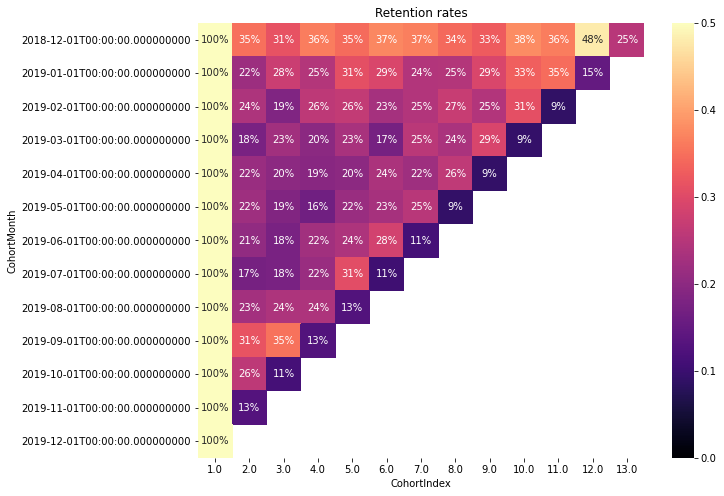

In [13]:
# visualize the cohort data
plt.figure(figsize=(10,8))
plt.title('Retention rates')
sb.heatmap(data=retention,
          annot=True,
          fmt='.0%',
          vmin=0.0,
          vmax=0.5,
          cmap='magma')
plt.show()

RFM Analysis

In [14]:
online['TotalSpend'] = online['Price'] * online['Quantity']
online.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSpend
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019-12-01,2019-06-01,7.0,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0,71.64


In [15]:
# create quartiles on TotalSpend
# 1 lowest quartile, 4 highest spend quartile
spend_quartiles = pd.qcut(online['TotalSpend'], q=4, labels=range(1,5))
online['Spend_Quartile'] = spend_quartiles
online.sort_values('TotalSpend')

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSpend,Spend_Quartile
475332,C541433,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,-74215,12346.0,United Kingdom,2019-01-01,2019-01-01,1.0,-840113.80,1
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom,2019-12-01,2019-05-01,8.0,-501359.05,1
533232,C536757,2018-12-02,84347,Rotating Silver Angels T-Light Hldr,10.28,-9360,15838.0,United Kingdom,2018-12-01,2018-12-01,1.0,-96220.80,1
378552,C550456,2019-04-18,21108,Fairy Cake Flannel Assorted Colour,12.40,-3114,15749.0,United Kingdom,2019-04-01,2019-01-01,4.0,-38613.60,1
378550,C550456,2019-04-18,85123A,Cream Hanging Heart T-Light Holder,12.86,-1930,15749.0,United Kingdom,2019-04-01,2019-01-01,4.0,-24819.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331834,554868,2019-05-27,22197,Popcorn Holder,10.99,4300,13135.0,United Kingdom,2019-05-01,2019-05-01,1.0,47257.00,4
117790,573008,2019-10-27,84077,World War 2 Gliders Asstd Designs,10.47,4800,12901.0,United Kingdom,2019-10-01,2019-03-01,8.0,50256.00,4
41367,578841,2019-11-25,84826,Asstd Design 3d Paper Stickers,6.19,12540,13256.0,United Kingdom,2019-11-01,2019-11-01,1.0,77622.60,4
473985,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346.0,United Kingdom,2019-01-01,2019-01-01,1.0,840113.80,4


In [16]:
# add a new column in order to calculate recency
online['InvoiceDate'] = online['Date']
online.head(3)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSpend,Spend_Quartile,InvoiceDate
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019-12-01,2019-06-01,7.0,257.64,4,2019-12-09
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0,383.40,4,2019-12-09
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0,138.36,4,2019-12-09


In [17]:
online['recency'] = (dt.datetime.now() - online['InvoiceDate']).dt.days
online.head(3)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSpend,Spend_Quartile,InvoiceDate,recency
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019-12-01,2019-06-01,7.0,257.64,4,2019-12-09,948
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0,383.40,4,2019-12-09,948
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019-12-01,2018-12-01,13.0,138.36,4,2019-12-09,948


In [20]:
# recency using retention rates, decreasing order
r_labels = list(range(4, 0,-1))
recency_quartiles = pd.qcut(online['recency'], q=4, labels=r_labels)
online['Recency_Quartile'] = recency_quartiles
online.sort_values('recency')
online.tail()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSpend,Spend_Quartile,InvoiceDate,recency,Recency_Quartile
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,2018-12-01,2018-12-01,1.0,-37.92,1,2018-12-01,1321,1
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,2018-12-01,2018-12-01,1.0,-42.27,1,2018-12-01,1321,1
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,2018-12-01,2018-12-01,1.0,-11.74,1,2018-12-01,1321,1
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,2018-12-01,2018-12-01,1.0,-65.40,1,2018-12-01,1321,1
536349,C536548,2018-12-01,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany,2018-12-01,2018-12-01,1.0,-40.90,1,2018-12-01,1321,1


In [ ]:
# recency using retention rates, create descriptive labels
#r_labels = ['Active', 'Lapsed', 'Inactive', 'Churned']
#recency_quartiles = pd.qcut(online['Recency_Days'], q=4, labels=r_labels)
#online['Recency_Quartile'] = recency_quartiles
# sort values from lowest to highest
#online.sort_values('Recency_Days')

In [21]:
online.to_pickle('cohort_analysis_071422.pickle')

preprocessing steps to get data ready for RFM

In [23]:
online['TotalSum'] = online['Price'] * online['Quantity']
online.head(1)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSpend,Spend_Quartile,InvoiceDate,recency,Recency_Quartile,TotalSum
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019-12-01,2019-06-01,7.0,257.64,4,2019-12-09,948,4,257.64


In [25]:
# last 12 months of data
print('Min:{}; Max:{}'.format(min(online['InvoiceDate']),
                              max(online['InvoiceDate'])))

Min:2018-12-01 00:00:00; Max:2019-12-09 00:00:00


In [27]:
# create snapshot_date data for analysis
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)

In [30]:
# ready to calculate the RFM Values
# aggregrate the data on a customer level
datamart = online.groupby(['CustomerNo']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'TransactionNo': 'count',
    'TotalSum': 'sum'})
# rename column for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency',
                          'TransactionNo': 'Frequency',
                          'TotalSum' : 'MonetaryValue'}, inplace=True)
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerNo,,,
12004.0,228,56,1509.60
12006.0,219,1,24.76
12008.0,277,203,5689.57
12013.0,360,1,69.96
12024.0,177,5,149.52


Building RFM Segments

In [32]:
# recency labels, the more active to the current date the better so those customers get a higher number 
# The smaller recency number is a higher quartile
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels=r_labels)
datamart = datamart.assign(R = r_quartiles.values)

In [33]:
# frequency and monetary value are considered better when they are higher
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels=f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels=m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

In [35]:
datamart.head(3)

,Recency,Frequency,MonetaryValue,F,M,R
CustomerNo,,,,,,
12004.0,228,56,1509.60,3,1,1
12006.0,219,1,24.76,1,1,1
12008.0,277,203,5689.57,4,3,1


In [37]:
# build RFM Segment(concat quartiles) and RFM Score(sum RFM quartiles values)
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

In [38]:
datamart.head(3)

,Recency,Frequency,MonetaryValue,F,M,R,RFM_Segment,RFM_Score
CustomerNo,,,,,,,,
12004.0,228,56,1509.60,3,1,1,131,5
12006.0,219,1,24.76,1,1,1,111,3
12008.0,277,203,5689.57,4,3,1,143,8


Analyse the RFM Segments

In [39]:
# find largest RFM_segments
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    448
111    424
344    202
211    194
122    173
222    166
433    161
333    155
233    144
322    144
dtype: int64

In [49]:
# Filter on RFM_Segments
# Select bottom RFM_Segment 
datamart[datamart['RFM_Segment']=='111']

,Recency,Frequency,MonetaryValue,F,M,R,RFM_Segment,RFM_Score
CustomerNo,,,,,,,,
12006.0,219,1,24.76,1,1,1,111,3
12013.0,360,1,69.96,1,1,1,111,3
12024.0,177,5,149.52,1,1,1,111,3
12060.0,366,1,36.75,1,1,1,111,3
12063.0,218,3,39.33,1,1,1,111,3
...,...,...,...,...,...,...,...,...
18233.0,326,1,492.00,1,1,1,111,3
18256.0,355,4,-769.00,1,1,1,111,3
18269.0,359,8,859.76,1,1,1,111,3


In [51]:
# Summarize the RFM_Score Metrics
datamart.groupby('RFM_Score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'MonetaryValue' : ['mean','count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           271.1       7.7         693.1   424
4           181.0      17.1        1270.8   416
5           147.6      22.5        2262.1   482
6            98.2      30.0        3345.4   527
7            84.2      49.9        5057.0   521
8            76.3      79.1        7573.4   527
9            61.5     121.6       11411.0   482
10           34.6     151.9       15148.8   519
11           20.3     244.8       28255.3   392
12            7.2     442.3       57048.4   448

In [52]:
def segment_score(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score']< 9):
        return 'Silver'
    else:
        return 'Bronze'
datamart['General_Segment'] = datamart.apply(segment_score, axis=1) 
datamart.groupby('General_Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue': ['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            226.5      12.3         979.2   840
Gold               31.9     234.4       27157.0  1841
Silver            100.6      45.9        4608.3  2057

In [53]:
online.to_pickle('cohort_analysis_071422.pickle')

Finding patterns in customer segments using K-Means Clustering

Preprocessing

In [58]:
print(datamart.mean()) 
print()
print(datamart.std())

Recency          9.624398e+01
Frequency        1.131902e+02
MonetaryValue    1.272644e+04
RFM_Segment               inf
RFM_Score        7.510975e+00
dtype: float64

Recency            102.230402
Frequency          238.244315
MonetaryValue    50535.780115
RFM_Score            2.769901
dtype: float64


In [60]:
datamart.describe() .T

,count,mean,std,min,25%,50%,75%,max
Recency,4738.0,96.243985,102.230402,1.00,18.000,53.00,156.00,374.00
Frequency,4738.0,113.190165,238.244315,1.00,19.000,51.00,132.00,7967.00
MonetaryValue,4738.0,12726.436290,50535.780115,-3722.46,1784.015,4691.93,11718.65,2108959.95
RFM_Score,4738.0,7.510975,2.769901,3.00,5.000,7.00,10.00,12.00


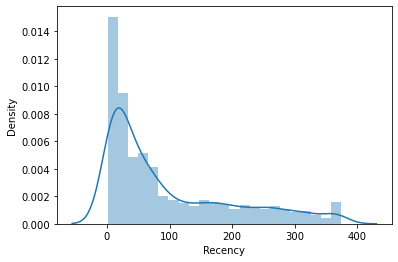

In [61]:
sb.distplot(datamart['Recency'])
plt.show()

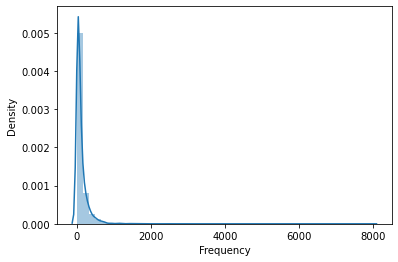

In [62]:
sb.distplot(datamart['Frequency'])
plt.show()

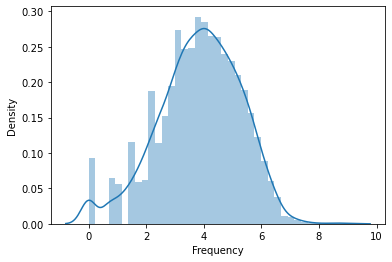

In [64]:
# manage skewness
frequency_log = np.log(datamart['Frequency'])
sb.distplot(frequency_log)
plt.show()

In [65]:
# if there are any negative values
# add a constant before log transformation
# use a cube root transformation

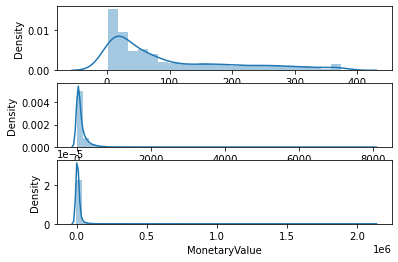

In [66]:
plt.subplot(3,1,1); sb.distplot(datamart['Recency'])
plt.subplot(3,1,2); sb.distplot(datamart['Frequency'])
plt.subplot(3,1,3); sb.distplot(datamart['MonetaryValue'])
plt.show()

In [67]:
datamart.head()

,Recency,Frequency,MonetaryValue,F,M,R,RFM_Segment,RFM_Score,General_Segment
CustomerNo,,,,,,,,,
12004.0,228,56,1509.60,3,1,1,131,5,Silver
12006.0,219,1,24.76,1,1,1,111,3,Bronze
12008.0,277,203,5689.57,4,3,1,143,8,Silver
12013.0,360,1,69.96,1,1,1,111,3,Bronze
12024.0,177,5,149.52,1,1,1,111,3,Bronze


In [68]:
datamart_rfm = datamart[['Recency', 'Frequency', 'MonetaryValue']].copy()
datamart_rfm.head(3)

,Recency,Frequency,MonetaryValue
CustomerNo,,,
12004.0,228,56,1509.60
12006.0,219,1,24.76
12008.0,277,203,5689.57


In [69]:
# centering and scaling the variables to optimize K-Means
# center: subtract average value from each observation
datamart_centered = datamart_rfm - datamart_rfm.mean()
datamart_centered.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4738.00,4738.00,4738.00
mean,-0.00,-0.00,0.00
std,102.23,238.24,50535.78
min,-95.24,-112.19,-16448.90
25%,-78.24,-94.19,-10942.42
50%,-43.24,-62.19,-8034.51
75%,59.76,18.81,-1007.79
max,277.76,7853.81,2096233.51


In [70]:
# scaling std: divide variable by the std of each
datamart_scaled = datamart_rfm / datamart_rfm.std()
datamart_scaled.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4738.00,4738.00,4738.00
mean,0.94,0.48,0.25
std,1.00,1.00,1.00
min,0.01,0.00,-0.07
25%,0.18,0.08,0.04
50%,0.52,0.21,0.09
75%,1.53,0.55,0.23
max,3.66,33.44,41.73


In [90]:
# preprocessing pipeline
# unskew the data, log transformation
# standardize to the same average values
# Scale to the same standard deviation
# store in a separate array to be used for clustering

In [79]:
# combine centering and scaling using SciKit Learn, same result as above
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)
print('mean: ', datamart_normalized.mean(axis=0).round(2))
print('std: ', datamart_normalized.std(axis=0).round(2))

mean:  [-0.  0. -0.]
std:  [1. 1. 1.]


In [92]:
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)
datamart_normalized = pd.DataFrame(datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)
datamart_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4738.00,4738.00,4738.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.93,-0.47,-0.33
25%,-0.77,-0.40,-0.22
50%,-0.42,-0.26,-0.16
75%,0.58,0.08,-0.02
max,2.72,32.97,41.48


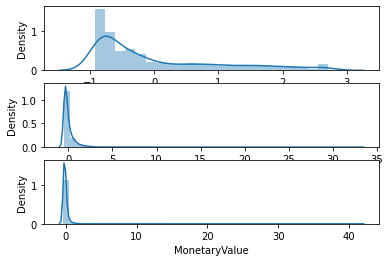

In [93]:
plt.subplot(3,1,1); sb.distplot(datamart_normalized['Recency'])
plt.subplot(3,1,2); sb.distplot(datamart_normalized['Frequency'])
plt.subplot(3,1,3); sb.distplot(datamart_normalized['MonetaryValue'])
plt.show()

In [86]:
# subplots should be more centered no skewed. 

K-Means Clustering

In [94]:
# have data preprocessed
# choose the number of clusters
# run k-means clustering on the preprocessed data
# analyze average RFM values on each cluster

In [99]:
# to get clusters use elbow method

In [113]:
kmeans = KMeans(n_clusters=2, random_state=1)

In [114]:
kmeans.fit(datamart_normalized)

KMeans(n_clusters=2, random_state=1)

In [115]:
cluster_labels = kmeans.labels_

In [116]:
# create cluster label column in the original DataFrame
datamart_rfm_k2 = datamart_rfm.assign(Cluster=cluster_labels)

In [117]:
datamart_rfm_k2.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          97.0     106.0       10614.0  4723
1           5.0    2443.0      677905.0    15

In [118]:
# find number of clusters using elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

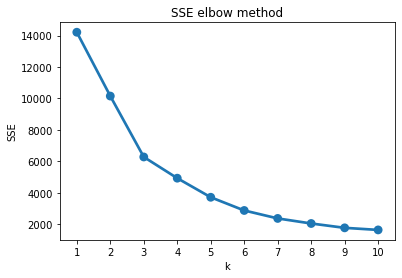

In [119]:
plt.title('SSE elbow method')
plt.xlabel('k'); plt.ylabel('SSE')
sb.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [120]:
# now build clustering at and around the elbow method
# analyse their properties, average RFM values
# compare against each other and choose one which makes most business sense

In [121]:
# repeat data with 4 clusters

In [122]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_

In [123]:
datamart_rfm_k4 = datamart_rfm.assign(Cluster=cluster_labels)
datamart_rfm_k4.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         245.0      46.0        3546.0  1285
1          41.0     128.0       13114.0  3437
2           6.0    1097.0      759323.0    12
3           2.0    5872.0      389519.0     4

In [124]:
# snake plots to understand and compare customer segments
datamart_normalized = pd.DataFrame(datamart_normalized,
                                  index=datamart_rfm.index,
                                  columns=datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k4['Cluster']

In [125]:
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                       id_vars=['CustomerNo', 'Cluster'],
                       value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                       var_name='Attribute',
                       value_name='Value')

<AxesSubplot:title={'center':'Snake plot of standard variables'}, xlabel='Attribute', ylabel='Value'>

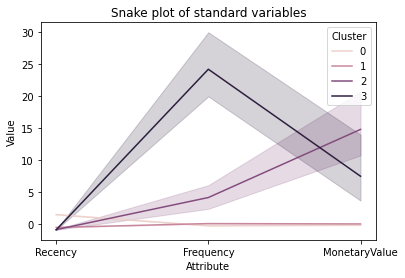

In [126]:
# visualize a snake plot
plt.title('Snake plot of standard variables')
sb.lineplot(x='Attribute', y='Value', hue='Cluster', data=datamart_melt)

In [127]:
# use technique to identify relative importance of each segment's attributes
# calculate the average values of each cluster, of each population
cluster_avg = datamart_rfm_k4.groupby(['Cluster']).mean()
population_avg = datamart_rfm.mean()
relative_imp = cluster_avg / population_avg-1
# ensures 0 is returned when cluster avg equals population avg

In [128]:
# analyse and plot relative importance 
# as ratio moves away from 0, attribute importance for a segment increases
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,1.55,-0.59,-0.72
1,-0.57,0.13,0.03
2,-0.94,8.70,58.67
3,-0.97,50.88,29.61


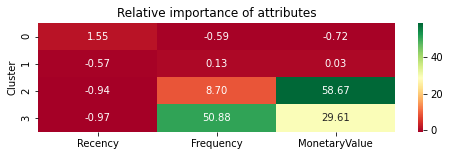

In [129]:
# plot heatmap
plt.figure(figsize=(8,2))
plt.title('Relative importance of attributes')
sb.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [130]:
# implement an end-to-end customer segmentation solutions
# steps: Gather Data (update data with an additional variable)
# preprocess the data, 
# explore the data and decide on the number of clusters,
# run k-means clustering, 
# analyze and visualize the results

In [132]:
# add column Tenure for length as a customer
# tenure = today - date account opened 
# dataframe: R F M Tenure